In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
file_marrige_pop = 'illinois_married_county.csv'
file_income = 'illinois_median_income_county.csv'

marriage_pop_df = pd.read_csv(file_marrige_pop)
marriage_pop_df = marriage_pop_df.iloc[:,0:7]
marriage_pop_df['Total Married'] = marriage_pop_df['Total Married'].str.replace(",","").astype(float)
marriage_pop_df['Total population'] = marriage_pop_df['Total population'].str.replace(",","").astype(float)
marriage_pop_df = marriage_pop_df.fillna('0')


races = marriage_pop_df['Race'].unique()
races = races[0:6]
years = marriage_pop_df['Year'].astype('int64').unique()
years = years[0:9]
counties = marriage_pop_df['County'].unique()
counties = counties[0:10]
marriage_pop_df.head()

,Year,County,Race,Total Married,Percent Married,Total population,Percent of population
0,2017,Cook,White,2.48118e+06,47.40%,3.07258e+06,58.70%
1,2017,Cook,Black or African American,996533,23.40%,1.29184e+06,24.70%
2,2017,Cook,American Indian and Alaska Native,11353,42.20%,38651,0.70%
3,2017,Cook,Asian,309994,58.00%,414671,7.90%
4,2017,Cook,Native Hawaiian and Other Pacific Islander,1433,36.80%,5810,0.10%


In [49]:
marriage_pop_grouped = marriage_pop_df.iloc[:,0:7]
marriage_pop_grouped = marriage_pop_grouped.groupby(['County','Race','Year'])


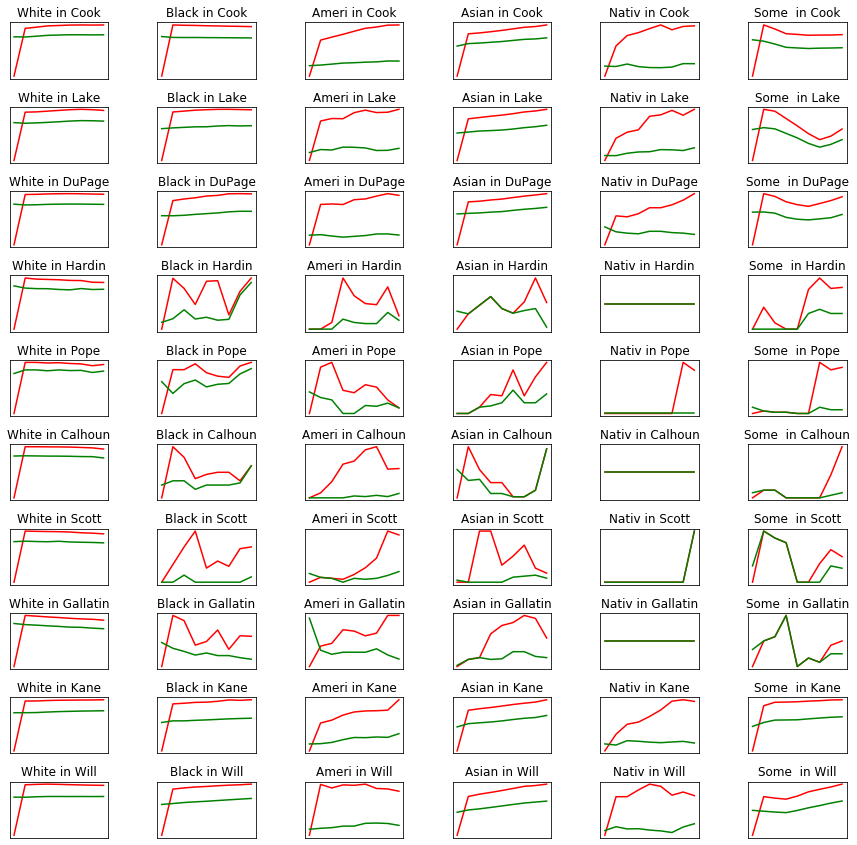

In [50]:
# fig, axs = plt.subplots(10,10, figsize=(15, 6), facecolor='w', edgecolor='k')

fig, ax = plt.subplots(10,6)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.subplots_adjust(hspace = .5, wspace=.5)
num = 1
for county in counties:
    for race in races:

        race_married = marriage_pop_df.loc[(marriage_pop_df['Race']==race) & \
                                           (marriage_pop_df['County']==county),'Total Married']
        race_pop = marriage_pop_df.loc[(marriage_pop_df['Race']==race) & \
                                       (marriage_pop_df['County']==county),'Total population']
        year = marriage_pop_df.loc[(marriage_pop_df['Race']==race) & \
                                       (marriage_pop_df['County']==county),'Year']
        ax=plt.subplot(10,6,num)
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
#         ax.get_xaxis().set_ticks(years)
#         ax.get_yaxis().set_ticks([])
        
        ax.plot(year, race_pop,color='r')
        ax.plot(year, race_married,color='g')
#         ax = fig.add_subplot(5,5,num)
#         ax.plot(year, race_married)
        ax.set_title(f"{race[0:5]} in {county}")
        num = num + 1

In [51]:
race_married = marriage_pop_df.loc[(marriage_pop_df['Race']=='White') & \
                                   (marriage_pop_df['County']=='Cook'),'Total Married']
counties




array(['Cook', 'Lake', 'DuPage', 'Hardin', 'Pope', 'Calhoun', 'Scott',
       'Gallatin', 'Kane', 'Will'], dtype=object)

In [55]:
# for county in counties:
#     print('\n')
#     for race in races:
#         print(race, county)

In [53]:
marriage_pop_df.loc[(marriage_pop_df['Race']=='White')&(marriage_pop_df['County']=='Cook'),'Total population']

0     3.07258e+06
6      3.0658e+06
12    3.07281e+06
18    3.06593e+06
24     3.0406e+06
30    3.01552e+06
36    2.93878e+06
42    2.86903e+06
48              0
Name: Total population, dtype: object

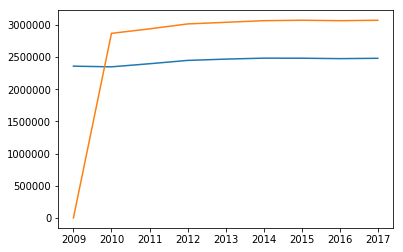

In [54]:
plt.plot(years, marriage_pop_df.loc[(marriage_pop_df['Race']=='White')&(marriage_pop_df['County']=='Cook'),'Total Married'])
plt.plot(years, marriage_pop_df.loc[(marriage_pop_df['Race']=='White')&(marriage_pop_df['County']=='Cook'),'Total population'])


